✍ В этом юните мы продолжим обсуждать проблемы классической МНК-модели линейной регрессии и способы их решения. Мы поговорим о **стандартизации векторов** и плавно перейдём к разбору **корреляционной матрицы.**

### **<center>СТАНДАРТИЗАЦИЯ ВЕКТОРОВ**

В модулях по разведывательному анализу данных и машинному обучению мы не раз говорили о преобразованиях признаков путём нормализации и стандартизации. Вспомним, что это такое ↓

>* **Нормализация** — это процесс приведения признаков к единому масштабу, например от 0 до 1. Пример — min-max-нормализация:

$$x_{scaled} =  \frac{x - x_{min}}{x_{max} - x_{min}}$$

>* **Стандартизация** — это процесс приведения признаков к единому масштабу характеристик распределения — нулевому среднему и единичному стандартному отклонению:

$$x_{scaled} =  \frac{x - x_{mean}}{x_{std}}$$

В линейной алгебре под стандартизацией вектора $\vec{x} \in R^n$ понимается несколько другая операция, которая проходит в два этапа:

1. **Центрирование вектора** — это операция приведения среднего к 0:

$$\vec{x}_{cent} = \vec{x} - \vec{x}_{mean}$$

2. **Нормирование вектора** — это операция приведения диапазона вектора к масштабу от -1 до 1 путём деления центрированного вектора на его длину:

$$\vec{x}_{st} =  \frac{\vec{x}_{cent}}{ \| \vec{x}_{cent} \| },$$

где $\vec{x}_{mean}$ — вектор, составленный из среднего значения вектора $\vec{x}$, а $\| \vec{x}_{cent} \|$ — длина вектора $\vec{x}_{cent}$ .

В результате стандартизации вектора всегда получается новый вектор, длина которого равна 1:

$$\| \vec{x}_{st} \|  = 1$$

**?**

**Пример № 1**

Необходимо стандартизировать векторы:

$$\vec{x}_1=\left(\begin{array}{l} 1 \\ 2 \\ 6 \end{array}\right) \text { и } \vec{x}_2=\left(\begin{array}{l} 3000 \\ 1000 \\ 2000 \end{array}\right)$$

Центрируем:

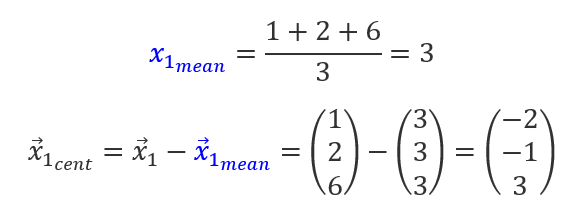

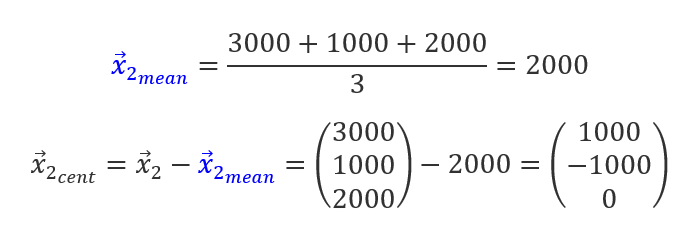

Нормируем:

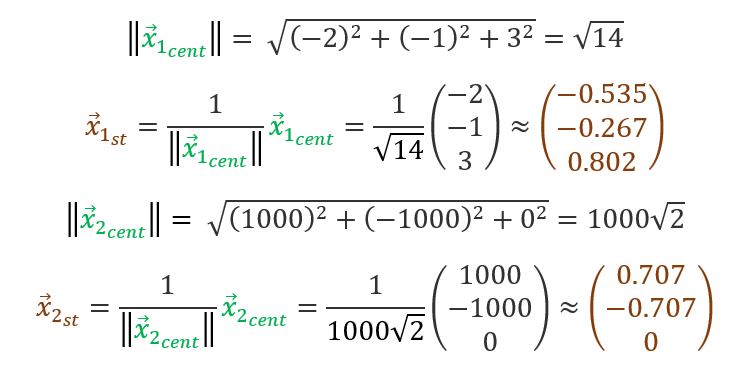

Как видите, теперь оба признака имеют значения от -1 до 1 и равный порядок, в отличие от исходных признаков.

Давайте посмотрим, что произойдёт с матрицей Грама после стандартизации векторов $x_{1}$ и $x_{2}$:

?

**Пример № 2**

Найти матрицу для стандартизированных признаков для

$$\vec{x}_1=\left(\begin{array}{l} 1 \\ 2 \\ 6 \end{array}\right) \text { и } \vec{x}_2=\left(\begin{array}{l} 3000 \\ 1000 \\ 2000 \end{array}\right)$$

Вычислим попарные скалярные произведения новых признаков:

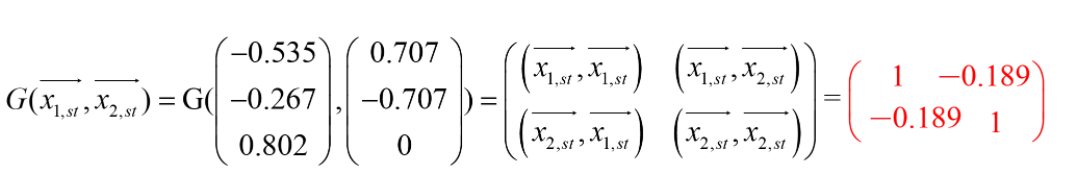

Как видите, все числа — в диапазоне от -1 до 1. 

>Забегая вперёд, скажем, что это так называемые **выборочные корреляции признаков**, а сама матрица является **матрицей корреляций** или **корреляционной матрицей**. Пока просто запомните, как выглядит эта матрица.

Вот **ещё одна особенность стандартизации ↓**

До стандартизации мы прогоняли регрессию $y$ на регрессоры $x_1, x_2, …, x_k$ и константу. Всего получалось $k+1$ коэффициентов:

$$\vec{y}=w_{0}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}+\ldots+w_{k} \vec{x}_{k}$$

После стандартизации мы прогоняем регрессию стандартизованного  на стандартизованные регрессоры **без константы:**

$$\vec{y}=w_{1_{st}} \vec{x}_{1_{st}}+w_{2_{st}} \vec{x}_{2_{st}}+\ldots+w_{k_{st}} \vec{x}_{k_{st}}$$

Математически мы получим одну и ту же регрессию в том смысле, что если пересчитать стандартизированные коэффициенты, мы получим исходные. То же и с прогнозом (пересчёт здесь опустим).

## **В ЧЁМ БОНУСЫ?**

Математика говорит, что регрессия исходного  на исходные («сырые») признаки c константой точно такая же, как регрессия стандартизированного на стандартизированные признаки без константы. В чём же разница? Математически — ни в чём.

На прогноз модели линейной регрессии, построенной по МНК, и её качество стандартизация практически не влияет. Масштабы признаков будут иметь значение только в том случае, если для поиска коэффициентов вы используете численные методы, такие как градиентный спуск (SGDRegressor из sklearn). О нём мы поговорим, когда будем знакомиться с алгоритмом градиентного спуска в модуле по оптимизации.

Однако **с точки зрения интерпретации важности коэффициентов разница есть.** Если вы занимаетесь отбором наиболее важных признаков по значению коэффициентов линейной регрессии на нестандартизированных данных, это будет не совсем корректно: один признак может изменяться от 0 до 1, а второй — от -1000 до 1000. Коэффициенты при них также будут различного масштаба. Если же вы посмотрите оценки коэффициентов регрессии после стандартизации, то они будут в едином масштабе, что даст более цельную и объективную картину.

Более важный бонус заключается в том, что **после стандартизации матрица Грама признаков** как по волшебству **превращается в корреляционную матрицу**, о которой пойдёт речь далее. Почему это хорошо? На свойства корреляционной матрицы опираются такие алгоритмы, как метод главных компонент и сингулярное разложение, а так как «сырая» и стандартизированная регрессия математически эквивалентны, то имеет смысл исследовать стандартизированную, а результаты обобщить на «сырую».

Рассмотрим всё это на **примере ↓**

**?**

**Пример № 3**

Вновь рассмотрим данные о стоимости жилья в районах Бостона.

На этот раз возьмём четыре признака: CHAS, LSTAT, CRIM и RM.

Для начала посмотрим на статистические характеристики с помощью метода describe():

In [204]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


Видим, что каждый из признаков измеряется в различных единицах и изменяется в различных диапазонах: например, CHAS лежит в диапазоне от 0 до 1, а вот CRIM — в диапазоне от 0.006 до 88.976.

Рассмотрим модель линейной регрессии по МНК без стандартизации. Помним, что необходимо добавить столбец из единиц:

In [205]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston_data[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


Вот наши коэффициенты. Округлим их для наглядности:

$$\hat{w}_0 = -1.92$$
$$\hat{w}_{CHAS} = 4$$
$$\hat{w}_{LSTAT} = -0.6$$
$$\hat{w}_{CRIM} = -0.1$$
$$\hat{w}_{RM} = 5$$

Давайте вспомним интерпретацию коэффициентов построенной модели линейной регрессии, которую мы изучали в модуле «ML-2. Обучение с учителем: регрессия». Значение коэффициента $\hat{w}_i$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении $x_i$ на 1.

Например, если количество низкостатусного населения (LSTAT) увеличится на 1 %, то медианная цена домов в районе (в среднем) упадёт на 0.6 тысяч долларов. А если среднее количество комнат (RM) в районе станет больше на 1, то медианная стоимость домов в районе (в среднем) увеличится на 5 тысяч долларов. 

`Тут в голову может прийти мысль: судя по значению коэффициентов, количество комнат (RM) оказывает на стоимость жилья большее влияние, чем процент низкостатусного населения (LSTAT). Однако` **такой вывод будет ошибочным**. `Мы не учитываем, что признаки, а значит и коэффициенты линейной регрессии, лежат в разных масштабах. Чтобы говорить о важности влияния признаков на модель, нужно строить её на стандартизированных данных.`

Помним, что для построения стандартизированной линейной регрессии нам не нужен вектор свободных коэффициентов, а значит и столбец из единиц тоже не понадобится.

Сначала центрируем векторы, которые находятся в столбцах матрицы $A$. Для этого вычтем среднее, вычисленное по строкам матрицы $A$ в каждом столбце, с помощью метода mean(). Затем разделим результат на длины центрированных векторов, вычисленных с помощью функции linalg.norm().

>**Примечание.** Обратите внимание, что для функции linalg.norm() обязательно необходимо указать параметр axis=0, так как по умолчанию норма считается для всей матрицы, а не для каждого столбца в отдельности. С определением нормы матрицы и тем, как она считается, вы можете ознакомиться в документации к функции norm().

In [206]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


Теперь векторы имеют одинаковые средние значения и стандартные отклонения. Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1:

In [207]:
print(np.linalg.norm(A_st, axis=0))
## [1. 1. 1. 1.]

[1. 1. 1. 1.]


Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной $y$ по тому же принципу:

In [208]:
# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

Формула для вычисления коэффициента та же, что и раньше, только матрица $A$ теперь заменяется на $A_{st}$, а $y$ — на $y_{st}$:

In [209]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


Вновь смотрим на коэффициенты. Помним, что коэффициента $\hat{w}_0$ у нас больше нет:

$$\hat{w}_{CHAS} = 0.11$$
$$\hat{w}_{LSTAT, \ st} = -0.45$$
$$\hat{w}_{CRIM, \ st} = -0.09$$
$$\hat{w}_{RM, \ st} = 0.38$$

Итак, мы видим картину, прямо противоположную той, что видели ранее. Теперь модуль коэффициента $\left|\hat{w}_{LSTAT, \ st} \right| = 0.45$ будет выше, чем модуль коэффициента $\left|\hat{w}_{RM, \ st} \right| = 0.38$. Значит, процент низкостатусного населения оказывает большее влияние на значение стоимости жилья, чем количество комнат.

Однако теперь интерпретировать сами коэффициенты в тех же измерениях у нас не получится.

**Сделаем важный вывод ↓**

Для того чтобы проинтерпретировать оценки коэффициентов линейной регрессии (понять, каков будет прирост целевой переменной при изменении фактора на 1 условную единицу), нам достаточно построить линейную регрессию в обычном виде без стандартизации и получить обычный вектор $\hat{\vec{w}}$.

Однако, чтобы корректно говорить о том, какой фактор оказывает на прогноз большее влияние, необходимо рассматривать стандартизированную оценку вектора коэффициентов $\hat{\vec{w}}_{st}$.

Давайте поближе взглянем на матрицу Грама для стандартизированных факторов:

In [210]:
# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


На самом деле мы с вами только что вычислили** матрицу выборочных корреляций** наших исходных факторов. Мы уже сталкивались с ней много раз в разделах по разведывательному анализу данных и машинному обучению, правда, вычисляли её мы с помощью функции Pandas, а теперь научились делать это вручную.

>**Примечание.** Матрицу корреляций можно получить только в том случае, если производить стандартизацию признаков как векторы (делить на длину центрированного вектора $\vec{x}_{st}$). Другие способы стандартизации/нормализации признаков не превращают матрицу Грама в матрицу корреляций.

Давайте разберёмся с математическими особенностями корреляционной матрицы.

### **<center>КОРРЕЛЯЦИОННАЯ МАТРИЦА**

>Напомним, что **корреляционная матрица** $C$ — это матрица выборочных корреляций между факторами регрессий.

$$C=corr(X)$$

Корреляция является одной из важнейших статистических характеристик выборки. Как мы уже знаем из модуля «EDA-2. Математическая статистика в контексте EDA», корреляцию можно измерять различным способами:

* корреляцией Пирсона;
* корреляцией Спирмена;
* корреляцией Кендалла.

>В этом модуле мы будем говорить именно о **корреляции Пирсона**. Она измеряет тесноту линейных связей между непрерывными числовыми факторами и может принимать значения от -1 до +1.

$$c_{ij} = corr(\vec{x}_{i}, \vec{x}_{j})$$

Как и любая статистическая величина, корреляция бывает **генеральной** и **выборочной**. Разница очень тонкая, и мы подробнее разберём её в модуле по теории вероятностей.

>**Генеральная (истинная) корреляция** — это теоретическая величина, которая отражает общую линейную зависимость между случайными величинами $X_i$ и $X_j$. Забегая вперёд скажем, что данная характеристика является абстрактной и вычисляется для **генеральных совокупностей** — всех возможных реализаций $X_i$ и $X_j$. В природе такой величины не существует, она есть только в теории вероятностей.

>**Выборочная корреляция** — это корреляция, вычисленная на ограниченной выборке. Это уже ближе к нашей теме. Выборочная корреляция отражает линейную взаимосвязь между факторами $\vec{x}_{i}$ и $\vec{x}_{j}$, реализации которых представлены в выборке.

Выборочная корреляция между факторами высчитывается по громоздкой (на первый взгляд) формуле:

$$c_{i j}= \operatorname{corr}\left(\vec{x}_i, \vec{x}_j\right)= \frac{\sum_{l=1}^n\left(x_{i l}-x_{i_{\text {mean }}}\right)\left(x_{j l}-x_{j_{\text {mean }}}\right)}{\sqrt{\sum_{l=1}^n\left(x_{i l}-x_{i_{\text {mean }}}\right)^2 \cdot \sum_{l=1}^n\left(x_{j l}-x_{j_{\text {mean }}}\right)^2}}$$

Из вычисленных $c_{ij}$ как раз и составляется матрица корреляций $C$. Если факторов $k$ штук, то матрица $C$ будет квадратной размера $dim C =(k,k)$:

$$C=\left(\begin{array}{cccc} c_{11} & c_{12} & \ldots & c_{1 k} \\ c_{21} & c_{22} & \ldots & c_{2 k} \\ \ldots & \ldots & \ldots & \ldots \\ c_{k 1} & c_{k 2} & \ldots & c_{k k} \end{array}\right)$$

Давайте разберём представленную выше формулу на простом примере. Но сначала нас вновь будут ждать довольно сложные формулы — не пугайтесь.

**?**

**Пример № 1**

Найти выборочную корреляцию факторов:

$$\vec{x}_1=\left(\begin{array}{l} 1 \\ 2 \\ 6 \end{array}\right) \text { и } \vec{x}_2=\left(\begin{array}{l} 3000 \\ 1000 \\ 2000 \end{array}\right)$$

Смотрим на формулу для выборочной корреляции. Чтобы вычислить коэффициент корреляции $c_{12}$, необходимо предварительно вычислить $\vec{x}_{1_{mean}}$ и $\vec{x}_{2_{mean}}$ — средние значения координат векторов.

Мы уже вычисляли их ранее:

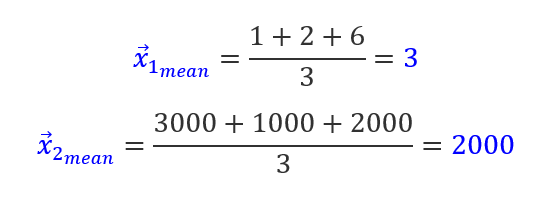

Далее нужно вычислить числитель:

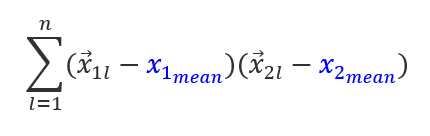

Если присмотреться, можно заметить не что иное, как скалярное произведение векторов $(\vec{x}_{1} -\vec{x}_{1_{mean}})$ и $(\vec{x}_{2} -\vec{x}_{2_{mean}})$. Считаем:

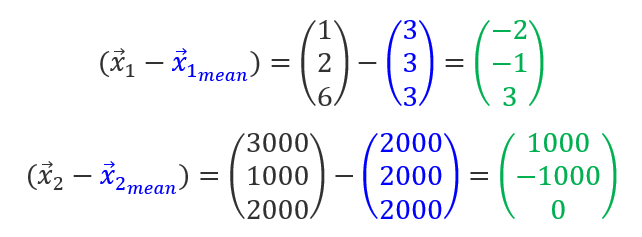

Кажется, мы это уже где-то видели. Да — это векторы $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$, которые мы получили, когда стандартизировали векторы. Посчитаем их скалярное произведение:

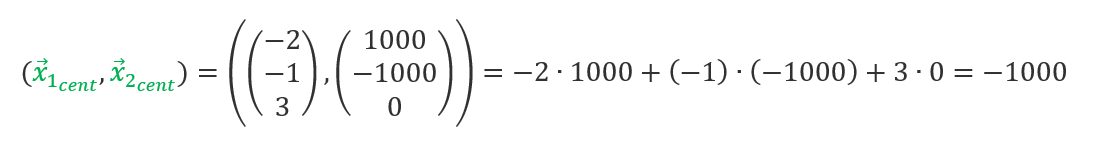

А что в знаменателе?

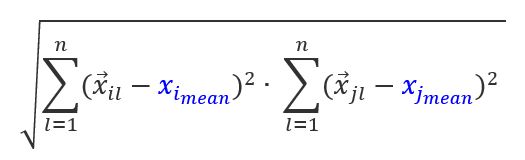

Это произведение длин векторов $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$.

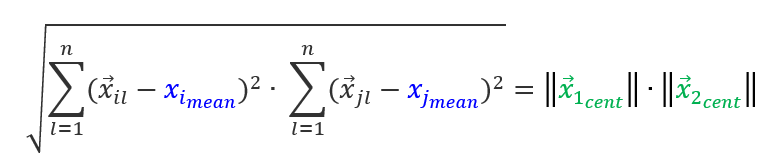

Мы также уже считали их в примере по стандартизации:

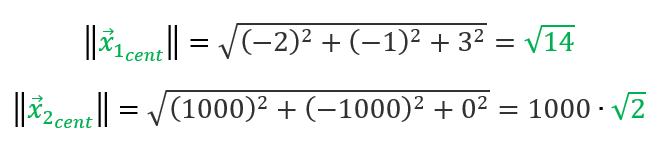

Считаем коэффициент корреляции:

$$c_{12}=\frac{\left(\vec{x}_{1_{\text {cent }}} \vec{x}_{2_{\text {cent }}}\right)}{\left\|\vec{x}_{1_{\text {cent }}}\right\| \cdot\left\|\vec{x}_{2_{\text {cent }}}\right\|}=\frac{-1000}{\sqrt{14} \cdot 1000 \cdot \sqrt{2}}=-\frac{1}{\sqrt{28}} \approx-0.189$$

Снова знакомые числа. Да — это элемент на побочной диагонали матрицы Грама, вычисленной для стандартизированных векторов $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$, а значит:

$$c_{12} = (\vec{x}_{1_{st}}, \vec{x}_{2_{st}})$$

>Если посчитать корреляцию в обратном порядке между факторами $c_{21}=(\vec{x}_{2_{st}}, \vec{x}_{1_{st}})$, получим то же самое число, ведь скалярное произведение перестановочно: $c_{12}=c_{21}$.

>**Ещё один очевидный факт** → Корреляция фактора с самим собой всегда равна 1: $c_{ii}=1$, то есть $c_{11}=c_{22}=1$. Так происходит потому, что скалярное произведение вектора с самим собой, деленное на квадрат длины вектора, всегда даёт 1 по свойствам скалярного произведения.

Вот мы и нашли нашу матрицу корреляций:

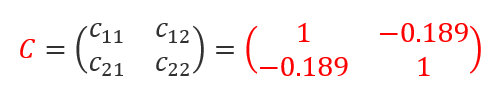

Она в точности совпадает с матрицей Грама, вычисленной для стандартизированных векторов $\vec{x}_{1_{st}}$ и $\vec{x}_{2_{st}}$:

$$C = G(\vec{x}_{1_{st}}, \vec{x}_{2_{st}})$$

**?**
Но «магия» ещё не закончилась. Давайте подумаем: какова геометрическая интерпретация корреляции?

Присмотритесь к формуле, вспомните свойства скалярного произведения, а затем загляните в ответ:

$$c_{i j}=\frac{\left(\vec{x}_{i_{\text {cent }}} \vec{x}_{j_{\text {cent }}}\right)}{\left\|\vec{x}_{i_{\text {cent }}}\right\| \cdot\left\|\vec{x}_{j_{\text {cent }}}\right\|}$$

Посмотреть ответ

Это косинус угла между центрированными векторами $\vec{x}_{i_{cent}}$ и $\vec{x}_{i_{cent}}$. По свойству скалярного произведения:

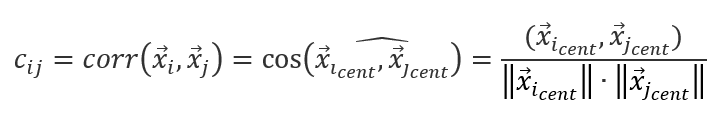

**Примечание.** В NumPy матрица корреляций вычисляется функцией np.corrcoef():

In [211]:
x_1 = np.array([1, 2, 6])
x_2 = np.array([3000, 1000, 2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

Получили тот же результат, что и раньше.

В Pandas матрица корреляций вычисляется методом corr(), вызванным от имени DataFrame.

На практике корреляция с точки зрения линейной алгебры означает следующее:

* Если корреляция $c_{ij} =1$, значит векторы $\vec{x}_i$ и $\vec{x}_j$ пропорциональны и сонаправлены.
* Если корреляция $c_{ij} =-1$, значит векторы $\vec{x}_i$ и $\vec{x}_j$ пропорциональны и противонаправлены.
* Если корреляция $c_{ij} =0$, значит векторы $\vec{x}_i$ и $\vec{x}_j$ ортогональны друг другу и, таким образом, являются линейно независимыми.

Во всех остальных случаях между факторами  и  существует какая-то линейная взаимосвязь, причём чем ближе модуль коэффициента корреляции к 1, тем сильнее эта взаимосвязь. Вспомним классификацию связей факторов, которую мы рассматривали в модуле «EDA-2. Математическая статистика в контексте EDA»:

Сила связи| Значение коэффициента корреляции.
------------ | -------------
Отсутствие связи или очень слабая связь| 0…+/- 0.3
Слабая связь | +/- 0.3…+/- 0.5
Средняя связь| +/- 0.5…+/- 0.7
Сильная связь | +/- 0.7…+/- 0.9
Очень сильная или абсолютная связь | +/- 0.9…+/-1

**Промежуточный вывод ↓**

Таким образом, матрица корреляций — это матрица Грама, составленная для стандартизированных столбцов исходной матрицы наблюдений $A$. Она всегда (в теории) симметричная. На главной диагонали этой матрицы стоят 1, а на местах всех остальных элементов — коэффициенты корреляции между факторами $\vec{x}_i$ и $\vec{x}_j$ .

Если коэффициент корреляции больше 0, то взаимосвязь между факторами прямая (растёт один — растёт второй), в противном случае — обратная (растёт один — падает второй).

Рассмотрим **пример ↓**

**?**

**Пример № 2**

Проинтерпретировать выборочные коэффициенты корреляции:

$corr(\vec{x}, \vec{u}) = 1$, $corr(\vec{x}, \vec{v}) = -1$,$corr(\vec{x}, \vec{w}) = 0$ 

Даны коэффициенты корреляции трёх пар факторов, причём это краевые значения. Что они означают?

* $corr(\vec{x}, \vec{u}) = 1$ означает что $\vec{x}$ и $$\vec{u}$$ линейно выражаются друг через друга и имеют прямую зависимость (когда растёт один фактор, растёт и другой).
* $corr(\vec{x}, \vec{v}) = -1$ говорит о точно такой же линейной, но обратной взаимосвязи.
* $corr(\vec{x}, \vec{w}) = 0$ означает, что факторы не связаны, то есть один фактор не чувствителен к изменениям другого.

Теперь коэффициенты принимают уже не экстремальные значения:

$corr(\vec{x}, \vec{u}) = 0.73$,$corr(\vec{x}, \vec{v}) = -0.72$ , $corr(\vec{x}, \vec{w}) = 0.12$

* $corr(\vec{x}, \vec{u}) =0.73$ говорит о сильной прямой взаимосвязи. Угол между векторами — острый.
* $corr(\vec{x}, \vec{v}) = -0.72$ говорит о сильной обратной взаимосвязи. Угол между векторами — тупой.
* $corr(\vec{x}, \vec{w}) = 0.12$ говорит о слабой прямой взаимосвязи. Угол между векторами острый, но близок к 90 градусам.

**?**

**Пример № 3**

Давайте посмотрим на корреляционную матрицу в задаче прогнозирования количества показов квартир агентства недвижимости «Рай в шалаше» в зависимости от разных параметров.

Здесь:

* Demo 2 w — количество показов квартир за две недели;
* Rub — стоимость аренды в рублях;
* Area — площадь квартиры;
* Liv.Area — жилая площадь квартиры;
* Floor — этаж;
* Euro — стоимость аренды в евро;
* NLiv.Area — нежилая площадь квартиры.

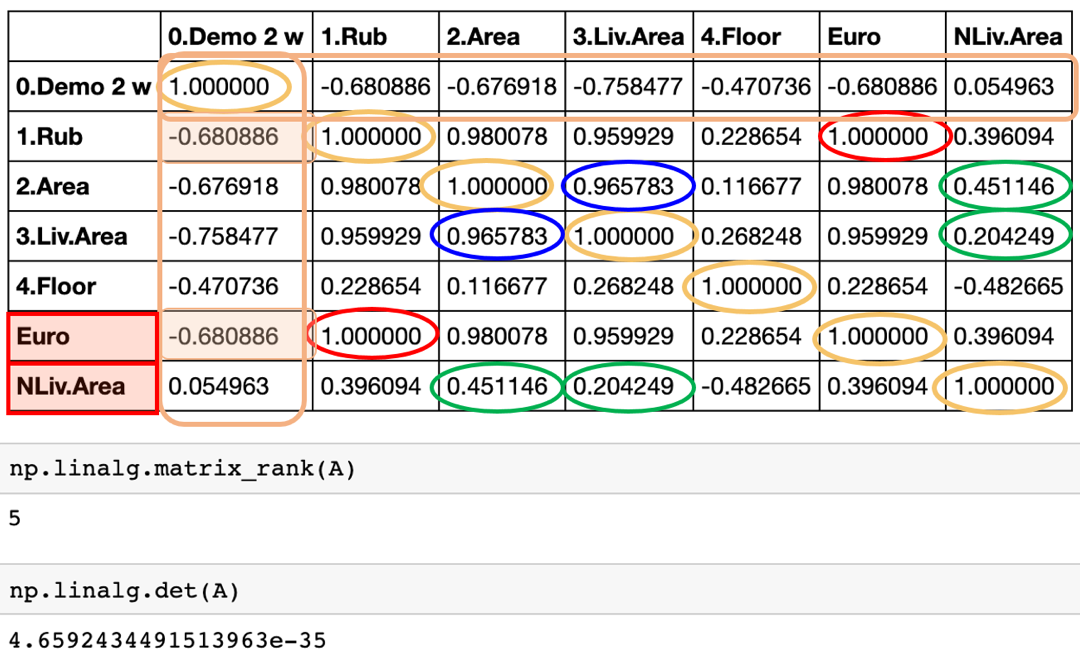

Матрица получилась размером 7x7, однако её ранг равен 5, а определитель — и вовсе 0. Что это значит? Для начала заметим, что по **главной диагонали** матрицы стоят единицы — это корреляция каждого фактора с самим собой. Разумеется, матрица симметрична: в первой строке и первом столбце расположены корреляции целевого параметра, то есть количества показов со всеми остальными факторами. Чем эти корреляции больше, тем сильнее взаимосвязь факторов.

Подозрительно одинаковыми выглядят **корреляции со стоимостью** аренды в рублях и евро. Корреляция между ними равна 1. Это логично так как факторы пропорциональны с каким-то коэффициентом. Кроме того, также странно велика **корреляция между жилой и общей площадью**. Чистой пропорциональности здесь нет, но из предыдущего модуля мы помним, что жилая, нежилая и общая площади линейно зависимы.

Обратите внимание, что **корреляции с нежилой площадью** не так велики. Итого мы нашли два избыточных набора факторов: один набор пропорционален, другой просто линейно зависим. Это случай чистой коллинеарности. Уберём по одному фактору из каждого, и ранг станет максимальным. 

Нежилая площадь имеет самую маленькую корреляцию с целевым параметром, поэтому мы избавимся от неё.

Между рублями и евро нет разницы — оставим рубли, так как они нам привычнее.

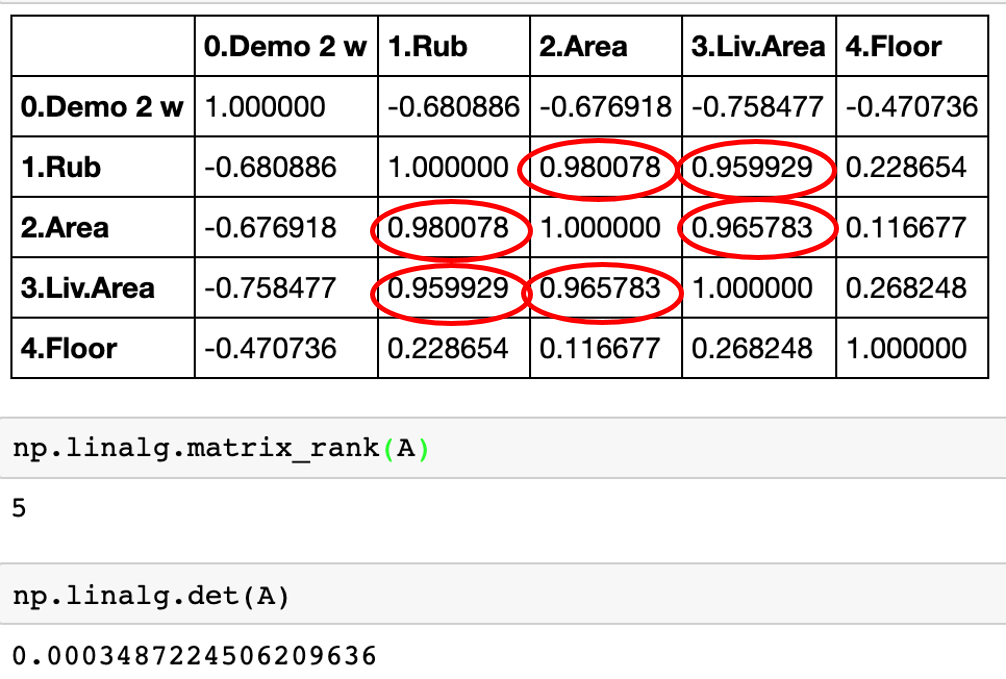

**?**
Итак, мы избавились от нежилой площади и аренды в евро. Ранг стал максимальным (то есть равным 5), чистой коллинеарности больше нет, но определитель всё равно маловат. В чём же дело?

Стоимость аренды жилой площади и общей площади сильно коррелируют между собой. Обратите внимание на значения коэффициентов корреляции — они практически равны 1, хотя формально эти факторы линейно независимы. Такие корреляции ощутимо портят картину, что и отражается на определителе.

Давайте оставим только жилую площадь, её корреляция с показами максимальна.

Корреляции между жилой площадью и этажом уже не такие сильные.

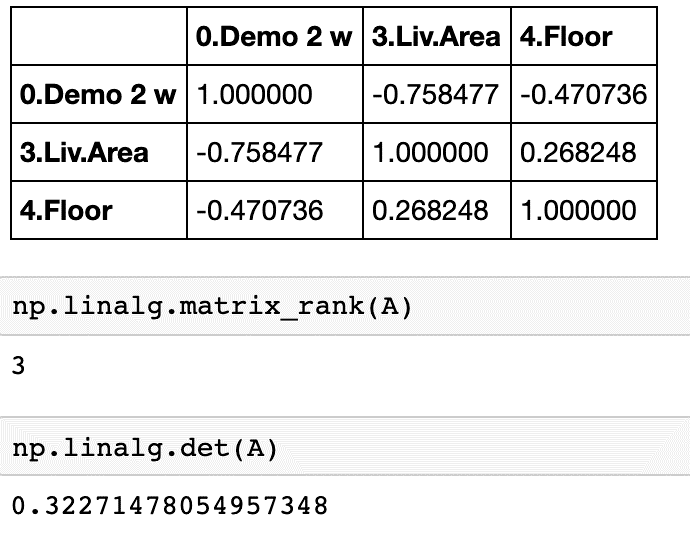

Ранг матрицы теперь равен 3 (как ему и положено), а определитель не так близок к нулю.

**Резюмируем ↓**

* Корреляция — это мера линейной зависимости между признаками.

* Чем больше по модулю корреляция между каким-нибудь фактором и целевым признаком, тем лучше:

$$\left|corr(\vec{x}_{i}, \vec{y}) \right| \rightarrow 1 - хорошо$$

* Чем больше по модулю корреляция между факторами, тем хуже:

$$\left|corr(\vec{x}_{i}, \vec{x}_{j}) \right| \rightarrow 1 - плохо$$

* Чем больше линейно зависимых факторов, тем меньше ранг.

`Можно выделить` **два неприятных случая:**

**Чистая коллинеарность**

`Некоторые факторы являются линейно зависимыми между собой. Это влечёт к уменьшению ранга матрицы факторов. Корреляции между зависимыми факторами близки к +1 или -1. Матрица корреляции вырождена.`

`Такие случаи очень редко встречаются на практике, но если вы таковые заметите, можете смело избавиться от одного из факторов.`

**Мультиколлинеарность**

`Формально линейной зависимости между факторами нет, и матрица факторов имеет максимальный ранг. Однако корреляции между мультиколлинеарными факторами по-прежнему близки к +1 или -1, и матрица корреляции практически вырождена, несмотря на то что имеет максимальный ранг.`

`Таким образом, чистая коллинеарность провоцирует больше проблем, но её легче заметить. Мультиколлинеарность же может быть скрытой, и заметить её не так просто.`

**КАК ОБНАРУЖИТЬ МУЛЬТИКОЛЛИНЕАРНОСТЬ?**

* Иногда видно сразу или заметно по контексту, что некоторые факторы будут коррелировать между собой.
* Также можно посмотреть на определитель матрицы корреляции: если он близок к нулю, значит дела обстоят не очень хорошо.
* Важным маркером будут странные результаты стандартной регрессионной формулы, например слишком большие по модулю коэффициенты (вспомните модуль «ML-2. Обучение с учителем: регрессия», где у нас получились запредельные коэффициенты при решении задач) или взаимно обратные коэффициенты (как мы видели в примере в предыдущем юните). 
* И, наконец, исследование спектра матрицы корреляций и числа обусловленности не только позволяет обнаружить мультиколлинераность, но и помогает избавиться от неё.

Есть много способов борьбы с мультиколлинеарностью. Мы с вами применили самый наивный — **удаление взаимных факторов «на глаз»**. Увы, это получается не всегда.

Два других метода называются по-разному, но по сути делают одно и тоже: это **метод главных компонент** для корреляционной матрицы и **сингулярное разложение** матрицы факторов. О них мы поговорим в следующем модуле. 

Кроме того, можно воспользоваться знакомыми нам **методами регуляризации**, о которых поговорим уже в этом модуле.

### **В ЧЁМ ПРОБЛЕМА МУЛЬТИКОЛЛИНЕАРНОСТИ ДЛЯ LINEAR REGRESSION?**

Несмотря на то что мультиколлинеарность делает матрицу корреляций более вырожденной, она не оказывает прямого влияния на точность модели сама по себе. Проблема полной вырожденности матрицы ($A^T A$), как мы уже обсуждали ранее, в sklearn вполне решается с помощью сингулярного разложения. То есть решение можно получить всегда даже при полной коллинеарности и сильной мультиколлинеарности, несмотря на противоречие с теорией линейной алгебры.

?
Однако сможем ли мы доверять такому решению?

Бывают задачи, где важно не просто построить модель, но и проинтерпретировать её результат — коэффициенты линейной регрессии. Типичный пример — задача кредитного скоринга: в ней важно понять, что влияет на вероятность дефолта заёмщика.

`Проблема заключается в том, что в случае мультиколлинеарности коэффициенты линейной регрессии становятся неустойчивыми. Например, признак «остаток долга/сумма выдачи» вроде бы должен приводить к уменьшению вероятности дефолта, так как клиенту остаётся выплачивать всё меньшую сумму. Однако мультиколлинеарность приводит к тому, что подобранный в ходе обучения модели коэффициент может сменить знак на противоположный, а признак, с точки зрения модели, может начать говорить об обратном: чем меньше остаётся платить, тем больше вероятность дефолта. Подобный кейс хорошо описан в` **[этой статье](https://habr.com/ru/company/akbarsdigital/blog/592493/)** `— рекомендуем с ней ознакомиться.`

`К тому же, чем больше в данных мультиколлинеарных факторов, тем сильнее увеличивается разброс коэффициентов регрессии. Полная коллинеарность означает, что существует бесконечное количество способов выразить один фактор через линейную комбинацию других. В свою очередь это значит, что есть бесконечное число возможных коэффициентов регрессии , таких, которые дают одни и те же результаты.` 

`Чем больше высококоррелированных факторов в данных, тем больше таких линейных комбинаций и тем больше коэффициенты становятся по модулю, что приводит к проблеме под названием «взрывной рост весов», когда коэффициенты регрессии начинают стремиться к бесконечности, что приводит к «поломке» даже устойчивой к вырожденным матрицам модели.`

**Задание 4.7**

Вычислите коэффициент корреляции между векторами $\vec{v}=(5, 1, 2)^T$ и $\vec{u}=(4, 2, 8)^T$.

Ответ округлите до двух знаков после точки-разделителя.

In [212]:
x_1 = np.array([5, 1, 2])
x_2 = np.array([4, 2, 8])
np.corrcoef(x_1,x_2)

array([[1.        , 0.05241424],
       [0.05241424, 1.        ]])

**Задание 4.8**

Составьте корреляционную матрицу для системы векторов:

$$\vec{x}_1=(5.1, 1.8, 2.1, 10.3, 12.1, 12.6)^T$$
$$\vec{x}_2=(10.2, 3.7, 4.1, 20.5, 24.2, 24.1)^T$$
$$\vec{x}_3=(2.5, 0.9, 1.1, 5.1, 6.1, 6.3)^T$$

Для расчёта используйте библиотеку NumPy или Pandas.

1. Чему равен ранг полученной корреляционной матрицы?

 
2. Чему равен определитель полученной корреляционной матрицы? Ответ округлите до седьмого знака после точки-разделителя.

In [213]:
x_1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x_2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x_3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
A = np.matrix([x_1, x_2, x_3])
A = A.T
A

matrix([[ 5.1, 10.2,  2.5],
        [ 1.8,  3.7,  0.9],
        [ 2.1,  4.1,  1.1],
        [10.3, 20.5,  5.1],
        [12.1, 24.2,  6.1],
        [12.6, 24.1,  6.3]])

### practicum


In [214]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df= pd.read_csv("data/housing.csv", delimiter=r"\s+",header=None,names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [215]:
A = np.column_stack([np.ones(506),df[['CHAS', 'LSTAT', 'CRIM','RM']]])#создаем numpy массив в интерсептом и 4 колонками из датафрейма
A
y = np.array(df["PRICE"])

In [216]:
#решаем линейную регресию:

w = np.linalg.inv(A.T@A)@A.T@y
print(w.reshape(5,1))

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


Сначала центрируем векторы, которые находятся в столбцах матрицы A. Для этого вычтем среднее, вычисленное по строкам матрицы A в каждом столбце, с помощью метода mean(). Затем разделим результат на длины центрированных векторов, вычисленных с помощью функции linalg.norm().

In [217]:
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent,axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


In [218]:
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)
y_st.describe().round(3)

,PRICE
count,506.000
mean,-0.000
std,0.044
min,-0.085
25%,-0.027
50%,-0.006
75%,0.012
max,0.133


In [219]:
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


In [220]:
A_st.T@A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


In [221]:
A = np.array([[1, 2, 6],[3000, 1000, 2000]])
A_ch = np.corrcoef(A)
A_ch

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

In [222]:
A = np.array([[5, 1, 2],[4, 2, 8]])
A_ch = np.corrcoef(A).round(2)
A_ch

array([[1.  , 0.05],
       [0.05, 1.  ]])

In [223]:
A = np.array([[5.1, 1.8, 2.1, 10.3, 12.1, 12.6],
              [10.2, 3.7, 4.1, 20.5, 24.2, 24.1],
              [2.5, 0.9, 1.1, 5.1, 6.1, 6.3]])
A_ch = np.corrcoef(A)
display(np.linalg.matrix_rank(A_ch))
display(np.linalg.det(A_ch).round(7))

3

5e-07

### центрирование и нормирование


In [235]:
import numpy as np
def proizved_mat(A,B):
    if type(B[0]) == type(1):
        matrix = [sum([el[i]*B[i] for i in range(len(el))]) for el in A]
    else:
        if len(A) != len(B[0]):
            print("dim_A != dim_B[0]")
        matrix = [[sum([B[j][i]*A[k][j] for j in range(len(B))]) for i in range(len(B[0]))]for k in range(len(A))]
    
    return matrix

def transpon(x):
    n = [[x[j][i] for j in range(len(x))]for i in range(len(x[0]))]
    return n

def centr(x):
    n = [el - (sum(x) / len(x)) for el in x]
    return n

def normir(x):
    l = sum([ el**2 for el in x]) ** 0.5
    n = [(1/l)*el for el in x]
    return n 

def sum_mat(A,B):
    if (len(A),len(A[0])) != (len(B),len(B[0])):
        print("dim_A != dim_B s")
        return 0
    m = [[A[i][j] + B[i][j] for j in range(len(A[0]))]for i in range(len(A))]
    return m 
def MNK(X,y,a=0):
    l =  len(X[0])
    e = [[a if i == j else 0 for j in range(l)]for i in range(l)]
    v = proizved_mat(np.linalg.inv(sum_mat(proizved_mat(transpon(X),X), e)),[sum([el[i]*y[i] for i in range(len(el))]) for el in transpon(X)])
    
    return v

In [236]:

#A_st = [normir(centr(A)), normir(centr(B))]
#[print(el )for el in proizved_mat(A_st,transpon(A_st))]


In [238]:
A =transpon([[1,1,1,1,1],[1,0,-3,2,4],[2,0,-6,4,8]])
y = [4,3,-4,2,7]
v = MNK(A,y,5)
print(v)

[0.6122448979591835, 0.29387755102040813, 0.5877551020408167]


In [240]:
A_2 = transpon([[1, 1, 1, 1, 1],
    [5, 9, 4, 3, 5],
    [15, 18, 18, 19, 19],
    [7, 6, 7, 7, 7]])
y_2 = [24, 22, 35, 33, 36]
v = MNK(A_2,y_2,1)
print(v)

[-0.08523045206905522, -1.7078412604918292, 1.9114121631570953, 0.7293992048299174]


In [ ]:
class LinearRegression:
        def __init__(self,X_data,Y_data,l,iterations): #initialize all parameters
            self.X=X_data
            self.Y=Y_data
            #weight and bias
            self.m=0 # смещение
            self.c=0 # веса 
            self.L=l #learning rate
            self.iter=iterations #num of iterations
            self.n=float(len(self.X))  #size of data
        
        def cost(self,pred_y): #cost function
            cost=np.sum(np.square(self.Y-pred_y))/(2*self.n)
            return(cost)
        
        def fit(self):
            self.history=np.zeros(self.iter)
            #updating values of m and c
            for i in range(self.iter):
                pred_y=self.m*X + self.c
                #print(pred_y)
                Dm= (-2/self.n)*(self.X*(self.Y-pred_y))
                Dc= (-2/self.n)*(self.Y-pred_y)
                #update
                self.m=self.m-Dm*self.L
                self.c=self.c-Dc*self.L
                #cost is calculated for every iteration
                self.history[i]=self.cost(pred_y)
            self.mse=self.MSE(self.Y,pred_y)
                
                
                
       
        def MSE(self,pred_y,Y):
            errors=Y-pred_y #error is the difference between actual and predicted value
            mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
            return mse
        
        def results(self):
            fig=plt.figure(figsize=(14,14))
            a1=fig.add_subplot(211)

            plt.title('minimisation of errors across the iterations')
            a1.plot(self.history)


            #making predictions
            a2=fig.add_subplot(212)
            final_y=self.m*self.X +self.c 
            plt.scatter(self.X,self.Y)
            plt.title('regrssion line')
            a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
            
            plt.show()
            
            print ('Mean Squared Error=',self.mse)

Iteration 1: Cost 4352.088931274409, Weight         0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight         1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight         1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight         1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight         1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight         1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight         1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight         1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight         1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight         1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.6408

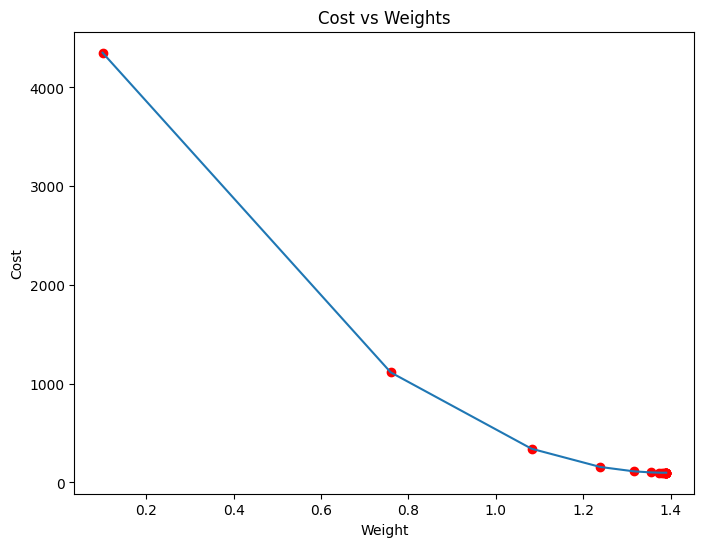

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


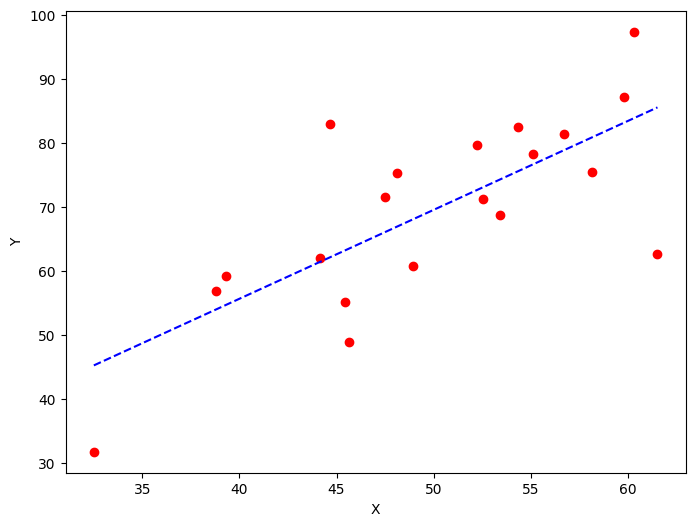

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
 
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, 
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters 
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to 
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 
 
def main():
     
    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
 
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + estimated_bias
 
    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
 
     
if __name__=="__main__":
    main()